In [34]:
import pandas as pd
import sqlite3

# Connect to the SQLite database
connection = sqlite3.connect("accident_data.db")

# Load the 2020 data from each table into pandas DataFrames
accident_df_2020 = pd.read_sql_query("SELECT * FROM accident WHERE accident_year = 2020", connection)
casualty_df_2020 = pd.read_sql_query("SELECT * FROM casualty WHERE accident_year = 2020", connection)
vehicle_df_2020 = pd.read_sql_query("SELECT * FROM vehicle WHERE accident_year = 2020", connection)
lsoa_df = pd.read_sql_query("SELECT * FROM lsoa", connection)


# Merge the DataFrames
# First merge accident with casualty data on accident_index
accident_casualty_merged_2020 = pd.merge(accident_df_2020, casualty_df_2020, on="accident_index", how="outer")

# Then merge the result with vehicle data on accident_index
accident_casualty_vehicle_merged_2020 = pd.merge(accident_casualty_merged_2020, vehicle_df_2020, on="accident_index", how="outer")

# Assuming 'lsoa_of_accident_location' from accident data corresponds to 'lsoa01cd' in lsoa data
# and you want to join the lsoa data with the merged data on these fields
final_merged_df_2020 = pd.merge(accident_casualty_vehicle_merged_2020, lsoa_df, left_on="lsoa_of_accident_location", right_on="lsoa01cd", how="outer")

# Check the structure of the final merged data frame
print(final_merged_df_2020.info())

# Close the connection to the database
connection.close()

In [112]:
import pandas as pd
import matplotlib.pyplot as plt
final_merged_df_2020 = pd.read_csv("output.csv", encoding='utf-8', encoding_errors='replace',low_memory=False)

In [113]:
final_merged_df_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 229833 entries, 0 to 229832
Data columns (total 87 columns):
 #   Column                                       Non-Null Count   Dtype  
---  ------                                       --------------   -----  
 0   lsoa_of_accident_location                    229833 non-null  object 
 1   accident_index                               220435 non-null  object 
 2   accident_year.x                              220435 non-null  float64
 3   accident_reference.x                         220435 non-null  object 
 4   location_easting_osgr                        220401 non-null  float64
 5   location_northing_osgr                       220401 non-null  float64
 6   longitude                                    220401 non-null  float64
 7   latitude                                     220401 non-null  float64
 8   police_force                                 220435 non-null  float64
 9   accident_severity                            220435 non-nul

In [114]:
final_merged_df_2020.head()

,lsoa_of_accident_location,accident_index,accident_year.x,accident_reference.x,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,...,age_of_vehicle,generic_make_model,driver_imd_decile,driver_home_area_type,objectid,lsoa01nm,lsoa01nmw,shape__area,shape__length,globalid
0,-1,2.02099E+12,2020.0,990972210,258724.0,664700.0,-4.258456,55.854729,99.0,3.0,...,17.0,FIAT PANDA,-1.0,-1.0,NaN,NaN,NaN,NaN,NaN,NaN
1,-1,2.02099E+12,2020.0,990972210,258724.0,664700.0,-4.258456,55.854729,99.0,3.0,...,11.0,NISSAN MODEL MISSING,7.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
2,-1,2.02099E+12,2020.0,990972210,258724.0,664700.0,-4.258456,55.854729,99.0,3.0,...,17.0,FIAT PANDA,-1.0,-1.0,NaN,NaN,NaN,NaN,NaN,NaN
3,-1,2.02099E+12,2020.0,990972210,258724.0,664700.0,-4.258456,55.854729,99.0,3.0,...,11.0,NISSAN MODEL MISSING,7.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
4,-1,2.02099E+12,2020.0,990972220,230537.0,610366.0,-4.674804,55.357989,99.0,3.0,...,10.0,SUBARU FORESTER,-1.0,-1.0,NaN,NaN,NaN,NaN,NaN,NaN


In [115]:
# Iterating over each column and printing the number of missing values
for column in final_merged_df_2020.columns:
    print(f"{column}: {final_merged_df_2020[column].isnull().sum()}")


lsoa_of_accident_location: 0
accident_index: 9398
accident_year.x: 9398
accident_reference.x: 9398
location_easting_osgr: 9432
location_northing_osgr: 9432
longitude: 9432
latitude: 9432
police_force: 9398
accident_severity: 9398
number_of_vehicles: 9398
number_of_casualties: 9398
date: 9398
day_of_week: 9398
time: 9398
local_authority_district: 9398
local_authority_ons_district: 9398
local_authority_highway: 9398
first_road_class: 9398
first_road_number: 9398
road_type: 9398
speed_limit: 9398
junction_detail: 9398
junction_control: 9398
second_road_class: 9398
second_road_number: 9398
pedestrian_crossing_human_control: 9398
pedestrian_crossing_physical_facilities: 9398
light_conditions: 9398
weather_conditions: 9398
road_surface_conditions: 9398
special_conditions_at_site: 9398
carriageway_hazards: 9398
urban_or_rural_area: 9398
did_police_officer_attend_scene_of_accident: 9398
trunk_road_flag: 9398
casualty_index: 9398
accident_year.y: 9398
accident_reference.y: 9398
vehicle_referenc

In [116]:
# Drop rows where 'accident_index' is NaN
df = final_merged_df_2020.dropna()

In [117]:
print("Before cleaning:", final_merged_df_2020.shape)
print("After cleaning:", df.shape)


Before cleaning: (229833, 87)
After cleaning: (201943, 87)


In [118]:
duplicate = df[df.duplicated()] 
print("Duplicate Rows :")  
# Print the resultant Dataframe
duplicate

Duplicate Rows :


,lsoa_of_accident_location,accident_index,accident_year.x,accident_reference.x,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,...,age_of_vehicle,generic_make_model,driver_imd_decile,driver_home_area_type,objectid,lsoa01nm,lsoa01nmw,shape__area,shape__length,globalid


In [119]:
# Loop through each column in the DataFrame
for column in df.columns:
    # Check if the column's data type is numeric
    if pd.api.types.is_numeric_dtype(df[column]):
        # Calculate the number of negative values
        negative_count = (df[column] < 0).sum()
        # Calculate the percentage of negative values
        percentage_negative = (negative_count / df.shape[0]) * 100
        # Print the column name and the percentage of negative values if it is a numeric column
        print(f"{column}: {percentage_negative:.2f}%")


accident_year.x: 0.00%
location_easting_osgr: 0.00%
location_northing_osgr: 0.00%
longitude: 83.25%
latitude: 0.00%
police_force: 0.00%
accident_severity: 0.00%
number_of_vehicles: 0.00%
number_of_casualties: 0.00%
day_of_week: 0.00%
local_authority_district: 1.07%
first_road_class: 0.00%
first_road_number: 0.00%
road_type: 0.00%
speed_limit: 0.01%
junction_detail: 0.00%
junction_control: 42.47%
second_road_class: 0.12%
second_road_number: 42.19%
pedestrian_crossing_human_control: 0.15%
pedestrian_crossing_physical_facilities: 0.15%
light_conditions: 0.00%
weather_conditions: 0.00%
road_surface_conditions: 0.30%
special_conditions_at_site: 0.23%
carriageway_hazards: 0.22%
urban_or_rural_area: 0.00%
did_police_officer_attend_scene_of_accident: 0.00%
trunk_road_flag: 3.27%
casualty_index: 0.00%
accident_year.y: 0.00%
vehicle_reference.x: 0.00%
casualty_reference: 0.00%
casualty_class: 0.00%
sex_of_casualty: 0.66%
age_of_casualty: 2.21%
age_band_of_casualty: 2.21%
casualty_severity: 0.00%

In [120]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 201943 entries, 9001 to 229593
Data columns (total 87 columns):
 #   Column                                       Non-Null Count   Dtype  
---  ------                                       --------------   -----  
 0   lsoa_of_accident_location                    201943 non-null  object 
 1   accident_index                               201943 non-null  object 
 2   accident_year.x                              201943 non-null  float64
 3   accident_reference.x                         201943 non-null  object 
 4   location_easting_osgr                        201943 non-null  float64
 5   location_northing_osgr                       201943 non-null  float64
 6   longitude                                    201943 non-null  float64
 7   latitude                                     201943 non-null  float64
 8   police_force                                 201943 non-null  float64
 9   accident_severity                            201943 non-null 

## 1.	Are there significant hours of the day, and days of the week, on which accidents occur?

C:\Users\HP\AppData\Local\Temp\ipykernel_11380\2478012791.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['hour'] = pd.to_datetime(df['time'], format='%H:%M').dt.hour


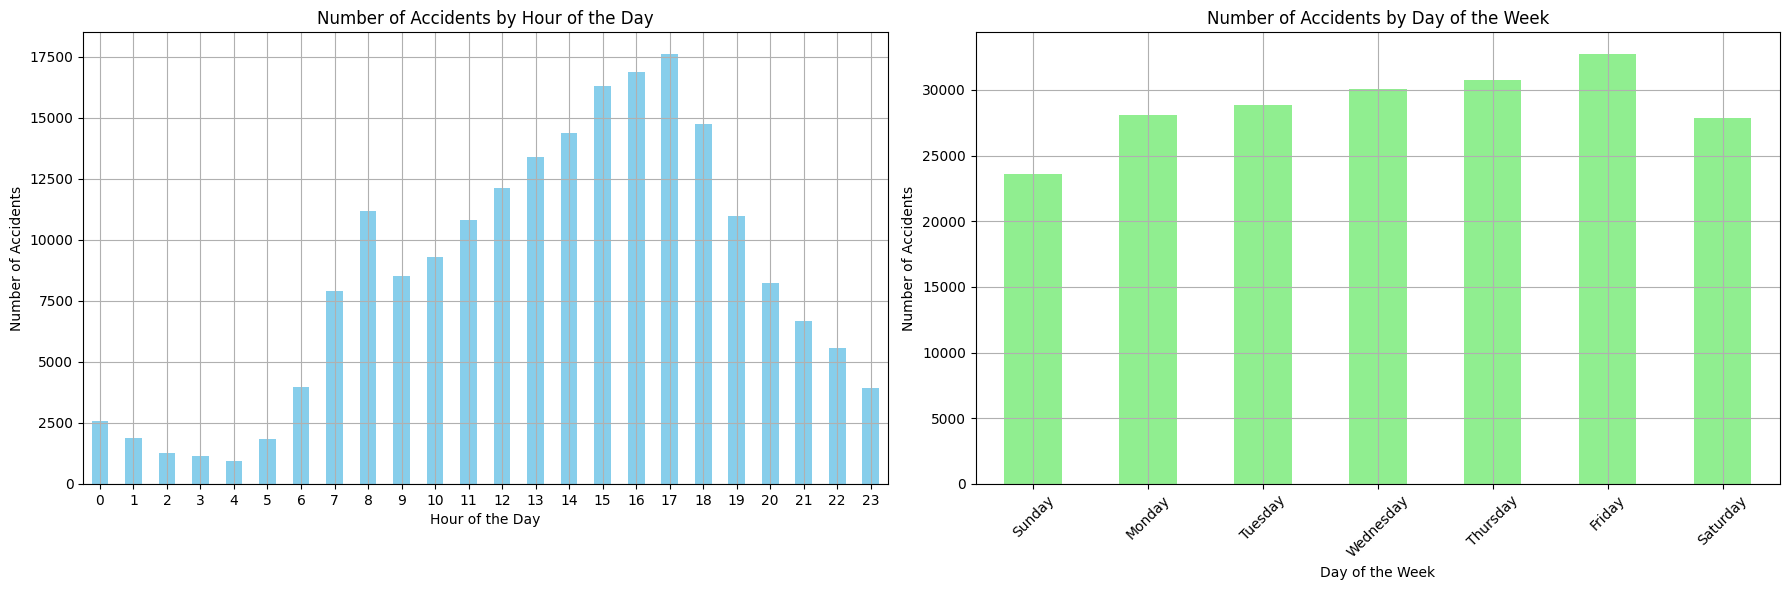

In [121]:
# Convert 'time' from string to datetime to extract the hour
df['hour'] = pd.to_datetime(df['time'], format='%H:%M').dt.hour

# Aggregate the number of accidents by hour
accidents_by_hour = df.groupby('hour').size()

# Aggregate the number of accidents by day of the week
# Assuming 'day_of_week' column is 1 (Sunday) to 7 (Saturday)
accidents_by_day = df.groupby('day_of_week').size()

# Map the day of the week from numbers to names
days = {1: 'Sunday', 2: 'Monday', 3: 'Tuesday', 4: 'Wednesday', 5: 'Thursday', 6: 'Friday', 7: 'Saturday'}
accidents_by_day.index = accidents_by_day.index.map(days)

# Set up the matplotlib figure and axes
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))  # 1 row, 2 columns

# Plot for Hour of the Day
accidents_by_hour.plot(kind='bar', color='skyblue', ax=ax1)
ax1.set_title('Number of Accidents by Hour of the Day')
ax1.set_xlabel('Hour of the Day')
ax1.set_ylabel('Number of Accidents')
ax1.set_xticks(range(0, 24))
ax1.set_xticklabels(range(0, 24), rotation=0)
ax1.grid(True)

# Plot for Day of the Week
accidents_by_day.plot(kind='bar', color='lightgreen', ax=ax2)
ax2.set_title('Number of Accidents by Day of the Week')
ax2.set_xlabel('Day of the Week')
ax2.set_ylabel('Number of Accidents')
ax2.set_xticklabels(days.values(), rotation=45)
ax2.grid(True)

plt.tight_layout()  # Adjust layout to make room for all plots
plt.show()


## 2.	For motorbikes, are there significant hours of the day, and days of the week, on which accidents occur? We suggest a focus on: Motorcycle 125cc and under, Motorcycle over 125cc and up to 500cc, and Motorcycle over 500cc.

C:\Users\HP\AppData\Local\Temp\ipykernel_11380\1714467406.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  motorcycles['category'] = pd.cut(motorcycles['engine_capacity_cc'],
C:\Users\HP\AppData\Local\Temp\ipykernel_11380\1714467406.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  motorcycles['hour'] = pd.to_datetime(motorcycles['time'], format='%H:%M').dt.hour
C:\Users\HP\AppData\Local\Temp\ipykernel_11380\1714467406.py:13: FutureWarning: The default of observed=False is deprecated and will be chang

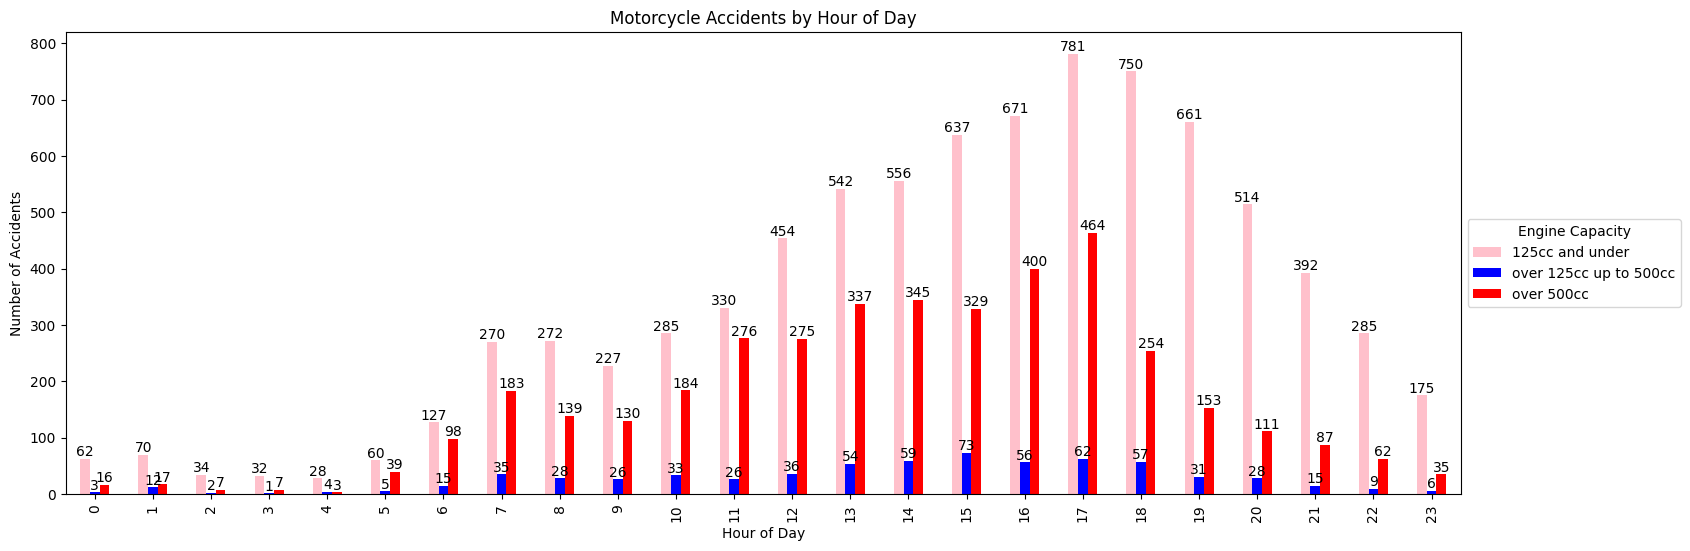

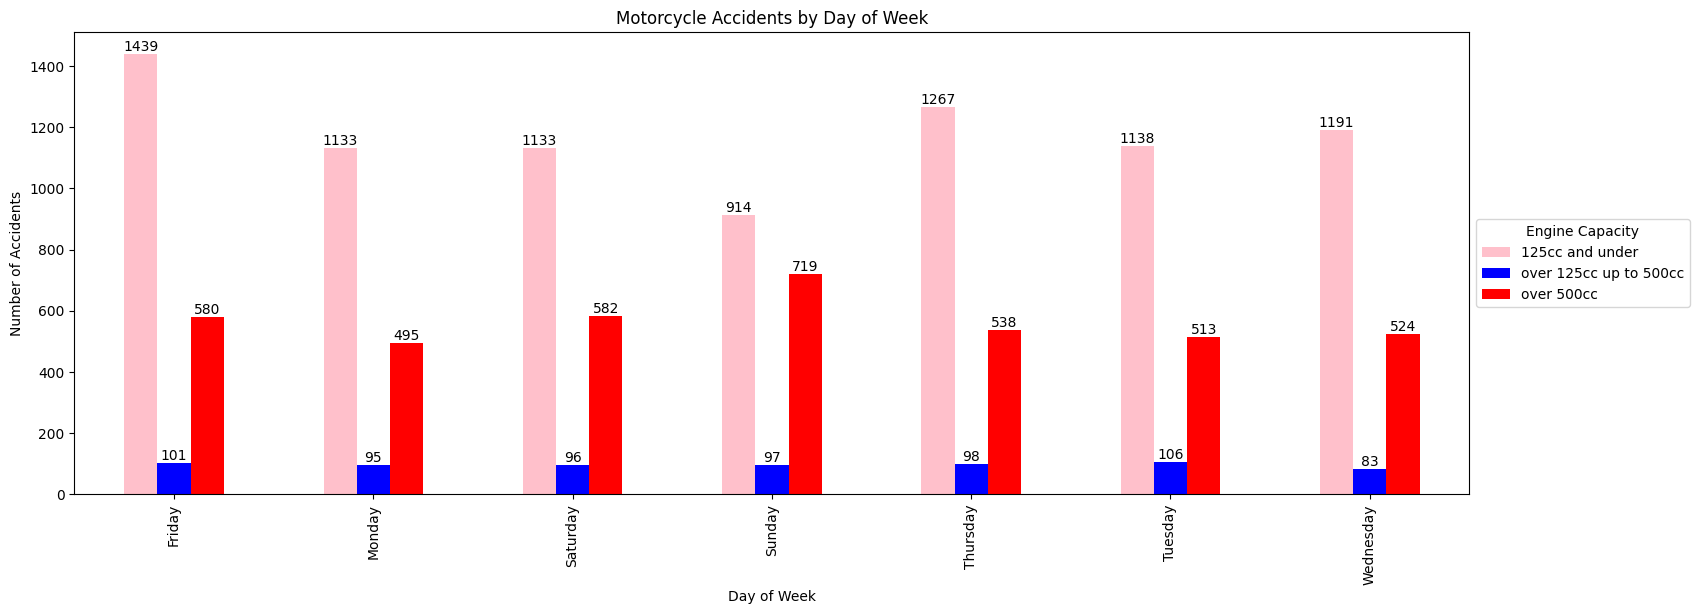

In [122]:
#  'vehicle_type' and 'engine_capacity_cc' columns exist and categorize motorcycles appropriately
motorcycles = df[df['vehicle_type'].isin([2, 3, 4, 5])]  # Example codes for motorcycles, to be adjusted based on data

# Define categories based on engine capacity
motorcycles['category'] = pd.cut(motorcycles['engine_capacity_cc'],
                                 bins=[0, 125, 500, float('inf')],
                                 labels=['125cc and under', 'over 125cc up to 500cc', 'over 500cc'])

# Extract hour from time
motorcycles['hour'] = pd.to_datetime(motorcycles['time'], format='%H:%M').dt.hour

# Create a DataFrame for accidents by hour and category
hourly_data = motorcycles.groupby(['hour', 'category']).size().unstack(fill_value=0)

# Create a DataFrame for accidents by day and category
motorcycles['day_name'] = motorcycles['day_of_week'].map(days)  # Using previously defined 'days' dictionary
daily_data = motorcycles.groupby(['day_name', 'category']).size().unstack(fill_value=0)

# Plot for hours of the day with increased width
fig, ax = plt.subplots(figsize=(18, 6))  # Define a new figure explicitly with figsize
hourly_plot = hourly_data.plot(kind='bar', stacked=False, color=['pink', 'blue', 'red'], ax=ax)
ax.set_title('Motorcycle Accidents by Hour of Day')
ax.set_xlabel('Hour of Day')
ax.set_ylabel('Number of Accidents')
ax.legend(title='Engine Capacity', loc='center left', bbox_to_anchor=(1, 0.5))

# Annotate each bar in hourly_plot
for container in hourly_plot.containers:
    ax.bar_label(container)

plt.show()  # Display the first plot

# Plot for days of the week with increased width
fig, ax = plt.subplots(figsize=(18, 6))  # Again, define a new figure with figsize
daily_plot = daily_data.plot(kind='bar', stacked=False, color=['pink', 'blue', 'red'], ax=ax)
ax.set_title('Motorcycle Accidents by Day of Week')
ax.set_xlabel('Day of Week')
ax.set_ylabel('Number of Accidents')
ax.legend(title='Engine Capacity', loc='center left', bbox_to_anchor=(1, 0.5))

# Annotate each bar in daily_plot
for container in daily_plot.containers:
    ax.bar_label(container)

plt.show()  # Display the second plot


### 3.	For pedestrians involved in accidents, are there significant hours of the day, and days of the week, on which they are more likely to be involved?

C:\Users\HP\AppData\Local\Temp\ipykernel_11380\1899950177.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pedestrian_accidents['hour'] = pd.to_datetime(pedestrian_accidents['time'], format='%H:%M', errors='coerce').dt.hour
C:\Users\HP\AppData\Local\Temp\ipykernel_11380\1899950177.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pedestrian_accidents['day_of_week'] = pd.to_datetime(pedestrian_accidents['date'], format='%d/%m/%Y', errors='coerce').dt.dayofweek


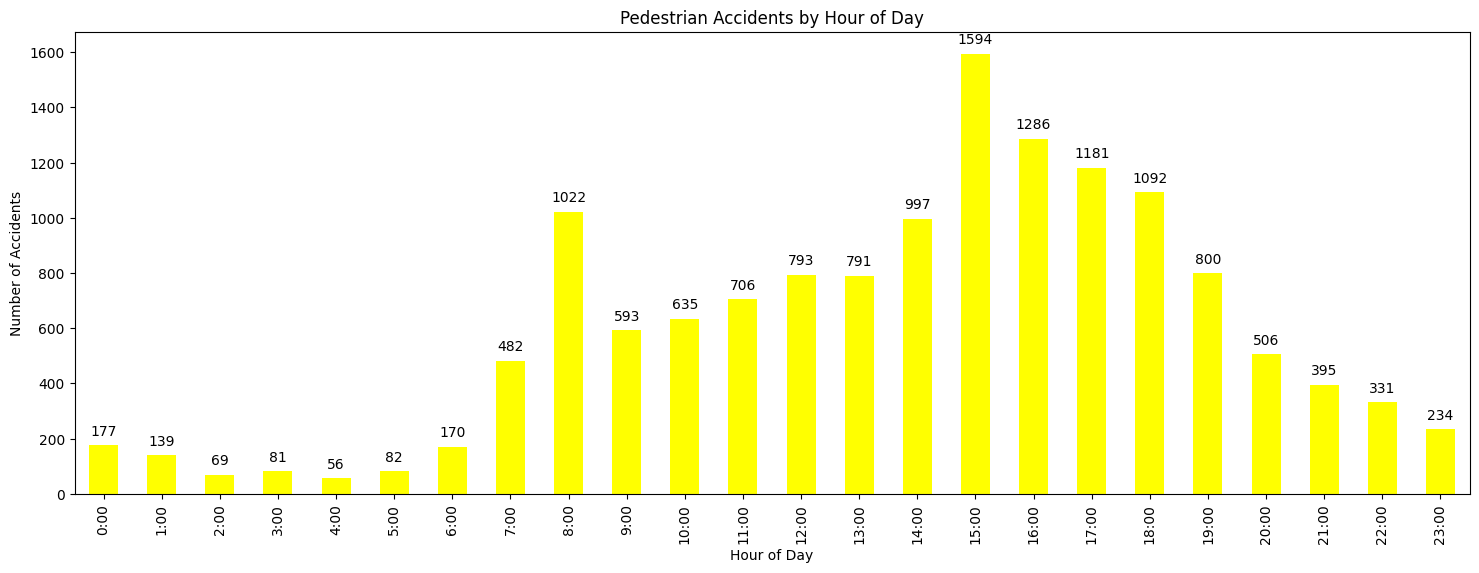

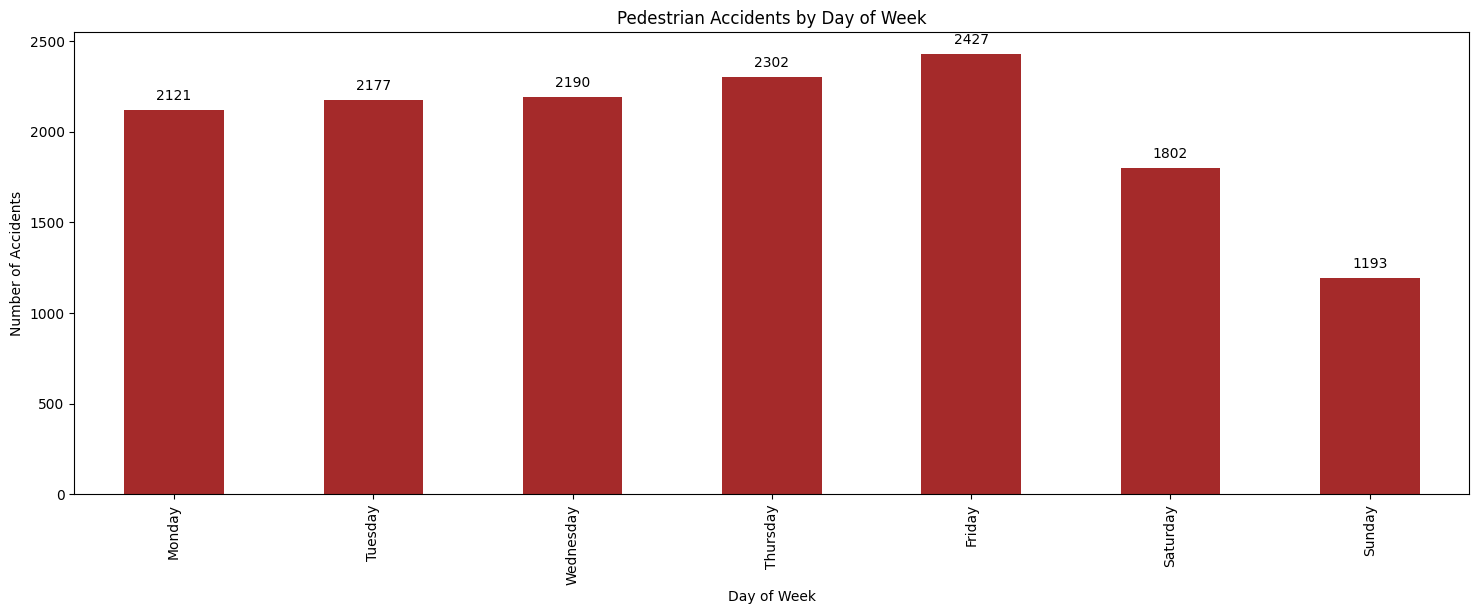

In [123]:
import pandas as pd
import matplotlib.pyplot as plt

# Filtering the DataFrame for pedestrian-related accidents, assuming 'casualty_class' == 3 for pedestrians
pedestrian_accidents = df[df['casualty_class'] == 3]

# Convert 'time' to datetime to extract the hour and 'date' to extract the day of the week
pedestrian_accidents['hour'] = pd.to_datetime(pedestrian_accidents['time'], format='%H:%M', errors='coerce').dt.hour
pedestrian_accidents['day_of_week'] = pd.to_datetime(pedestrian_accidents['date'], format='%d/%m/%Y', errors='coerce').dt.dayofweek

# Plot the number of pedestrian accidents by hour of the day
plt.figure(figsize=(18, 6))
hourly_counts = pedestrian_accidents['hour'].dropna().value_counts().sort_index()
ax_hourly = hourly_counts.plot(kind='bar', color='yellow')
plt.title('Pedestrian Accidents by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Accidents')
plt.xticks(ticks=range(24), labels=[f'{hour}:00' for hour in range(24)])

# Annotate each bar with the count
for bar in ax_hourly.patches:
    ax_hourly.annotate(f'{int(bar.get_height())}',
                       (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                       ha='center', va='bottom',
                       xytext=(0, 5), textcoords='offset points')

plt.show()

# Plot the number of pedestrian accidents by day of the week
plt.figure(figsize=(18, 6))
daily_counts = pedestrian_accidents['day_of_week'].dropna().value_counts().sort_index()
ax_daily = daily_counts.plot(kind='bar', color='brown')
plt.title('Pedestrian Accidents by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Number of Accidents')
plt.xticks(ticks=range(7), labels=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

# Annotate each bar with the count
for bar in ax_daily.patches:
    ax_daily.annotate(f'{int(bar.get_height())}',
                      (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                      ha='center', va='bottom',
                      xytext=(0, 5), textcoords='offset points')

plt.show()


### 4.	Using the apriori algorithm, explore the impact of selected variables on accident severity.  

In [32]:
!pip install mlxtend

     ---------------------------------------- 1.4/1.4 MB 837.3 kB/s eta 0:00:00



[notice] A new release of pip available: 22.3 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [132]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder


# Define the attributes that may influence accident severity
attributes = ['light_conditions', 'weather_conditions', 'road_surface_conditions', 'speed_limit']

#  accident severity is encoded with: 1 - Fatal, 2 - Serious, 3 - Slight
# Focus on fatal accidents (severity == 1)
df_fatal = df[df['accident_severity'] == 1].copy()

# Avoid SettingWithCopyWarning by using .loc on the original DataFrame
for attribute in attributes:
    df_fatal.loc[:, attribute] = attribute + '_' + df_fatal[attribute].astype(str)

# Create a list of transactions: each transaction is a list of features
transactions = df_fatal[attributes].values.tolist()

# One-hot encode the transaction data
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df_transactions = pd.DataFrame(te_ary, columns=te.columns_)

# Apply Apriori algorithm to find frequent itemsets with a lower minimum support threshold
frequent_itemsets = apriori(df_transactions, min_support=0.005, use_colnames=True)

# Generate association rules from these frequent itemsets
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.3)

# Print rules that have high lift and high confidence
high_impact_rules = rules[(rules['lift'] > 1.5) & (rules['confidence'] > 0.3)]
print(high_impact_rules)


C:\Users\HP\AppData\Local\Temp\ipykernel_11380\4239664991.py:15: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['light_conditions_1.0' 'light_conditions_1.0' 'light_conditions_1.0' ...
 'light_conditions_1.0' 'light_conditions_4.0' 'light_conditions_4.0']' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_fatal.loc[:, attribute] = attribute + '_' + df_fatal[attribute].astype(str)
C:\Users\HP\AppData\Local\Temp\ipykernel_11380\4239664991.py:15: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['weather_conditions_1.0' 'weather_conditions_1.0'
 'weather_conditions_1.0' ... 'weather_conditions_1.0'
 'weather_conditions_1.0' 'weather_conditions_1.0']' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_fatal.loc[:, attribute] = attribute + '_' + df_fatal[attribute].a

                                           antecedents  \
17                              (light_conditions_4.0)   
18                                  (speed_limit_30.0)   
20                            (weather_conditions_5.0)   
21                              (light_conditions_5.0)   
24                              (light_conditions_6.0)   
..                                                 ...   
402  (road_surface_conditions_2.0, weather_conditio...   
403  (road_surface_conditions_2.0, weather_conditio...   
404  (weather_conditions_8.0, speed_limit_70.0, lig...   
405         (weather_conditions_8.0, speed_limit_70.0)   
406     (weather_conditions_8.0, light_conditions_6.0)   

                                           consequents  antecedent support  \
17                                  (speed_limit_30.0)            0.164216   
18                              (light_conditions_4.0)            0.278867   
20                              (light_conditions_4.0)            0.0

In [133]:
high_impact_rules.head() # top 5 rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
17,(light_conditions_4.0),(speed_limit_30.0),0.164216,0.278867,0.085512,0.520730,1.867304,0.039718,1.504648,0.555728
18,(speed_limit_30.0),(light_conditions_4.0),0.278867,0.164216,0.085512,0.306641,1.867304,0.039718,1.205413,0.644082
20,(weather_conditions_5.0),(light_conditions_4.0),0.017429,0.164216,0.006536,0.375000,2.283582,0.003674,1.337255,0.572062
21,(light_conditions_5.0),(road_surface_conditions_2.0),0.009804,0.337963,0.006808,0.694444,2.054795,0.003495,2.166667,0.518416
24,(light_conditions_6.0),(speed_limit_60.0),0.193627,0.369826,0.116013,0.599156,1.620104,0.044405,1.572119,0.474664


### 5.	Identify accidents in our region: Kingston upon Hull, Humberside, and the East Riding of Yorkshire etc. You can do this by filtering on LSOA, or police region or another method if you can find one. Run clustering on this data. What do these clusters reveal about the distribution of accidents in our region? 

Filtered data is available for specified regions.


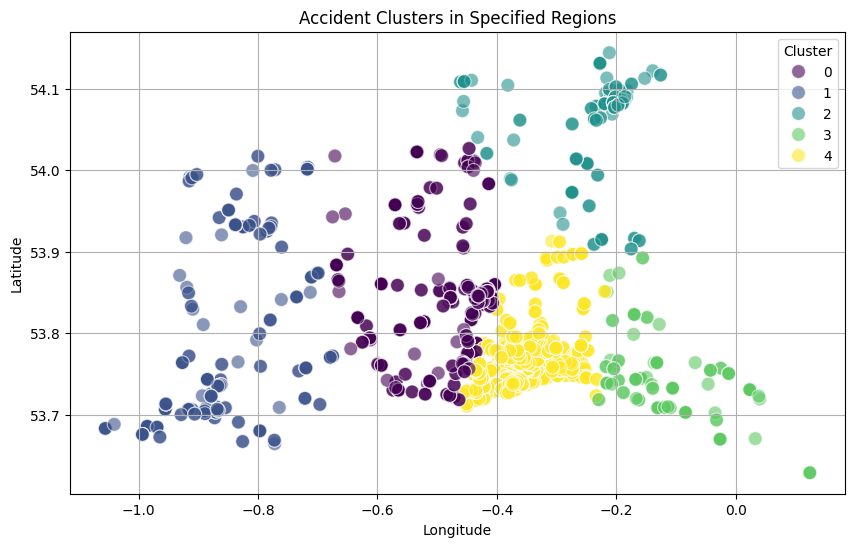

Cluster centers (Longitude, Latitude): [[-0.4991917  53.83935908]
 [-0.84309577 53.80225278]
 [-0.23278073 54.06249643]
 [-0.11089269 53.74102424]
 [-0.34469297 53.7639793 ]]


In [64]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns


# Exact matches from the unique values printed above
regions = ['Kingston upon Hull', 'Humberside', 'East Riding of Yorkshire']
filtered_data = df[df['lsoa01nm'].str.contains('|'.join(regions), na=False)]

# Check if filtered data is empty
if filtered_data.empty:
    print("No data found for the specified regions even after correction. Further investigation needed.")
else:
    print("Filtered data is available for specified regions.")

    # Assuming longitude and latitude are available and valid
    coords = filtered_data[['longitude', 'latitude']].dropna()

    # Run K-means clustering if data is sufficient
    if not coords.empty:
        kmeans = KMeans(n_clusters=5, random_state=0)  # Adjust the number of clusters as needed
        coords['cluster_label'] = kmeans.fit_predict(coords)

        # Plotting the clusters
        plt.figure(figsize=(10, 6))
        sns.scatterplot(x='longitude', y='latitude', hue='cluster_label', data=coords, palette='viridis', s=100, alpha=0.6)
        plt.title('Accident Clusters in Specified Regions')
        plt.xlabel('Longitude')
        plt.ylabel('Latitude')
        plt.legend(title='Cluster')
        plt.grid(True)
        plt.show()

        # Optionally, display cluster centers or other statistics
        print("Cluster centers (Longitude, Latitude):", kmeans.cluster_centers_)
    else:
        print("No coordinate data available for clustering.")


### 6.	Using outlier detection methods, identify unusual entries in your data set. Should you keep these entries in your data? 

In [86]:
import pandas as pd

def detect_remove_outliers_iqr(df):
    outlier_indices = []
    
    # Iterate over each column
    for col in df.select_dtypes(include=['float64', 'int64']).columns:
        Q1 = df[col].quantile(0.05)
        Q3 = df[col].quantile(0.95)
        IQR = Q3 - Q1
        lower_bound = Q1 - 2.0 * IQR
        upper_bound = Q3 + 2.0 * IQR
        
        # Find the indices of outliers
        outliers_list_col = df[(df[col] < lower_bound) | (df[col] > upper_bound)].index
        outlier_indices.extend(outliers_list_col)
        
        # Report the outliers per column
        print(f'Number of Outliers in {col}: {len(outliers_list_col)}')

    # Select observations containing more than one outlier
    outlier_indices = list(set(outlier_indices))
    print(f'Total outliers detected: {len(outlier_indices)}')

    # Optional: remove outliers
    df_cleaned = df.drop(outlier_indices)
    return df_cleaned

# Original DataFrame shape
print("Original DataFrame shape:", df.shape)

# Removing outliers
df_cleaned = detect_remove_outliers_iqr(df)

# DataFrame shape after removing outliers
print("DataFrame shape after removing outliers:", df_cleaned.shape)


Original DataFrame shape: (201943, 90)
Number of Outliers in accident_year.x: 0
Number of Outliers in location_easting_osgr: 0
Number of Outliers in location_northing_osgr: 0
Number of Outliers in longitude: 0
Number of Outliers in latitude: 0
Number of Outliers in police_force: 0
Number of Outliers in accident_severity: 0
Number of Outliers in number_of_vehicles: 104
Number of Outliers in number_of_casualties: 284
Number of Outliers in day_of_week: 0
Number of Outliers in local_authority_district: 0
Number of Outliers in first_road_class: 0
Number of Outliers in first_road_number: 0
Number of Outliers in road_type: 0
Number of Outliers in speed_limit: 0
Number of Outliers in junction_detail: 2870
Number of Outliers in junction_control: 0
Number of Outliers in second_road_class: 0
Number of Outliers in second_road_number: 5903
Number of Outliers in pedestrian_crossing_human_control: 9211
Number of Outliers in pedestrian_crossing_physical_facilities: 0
Number of Outliers in light_condit

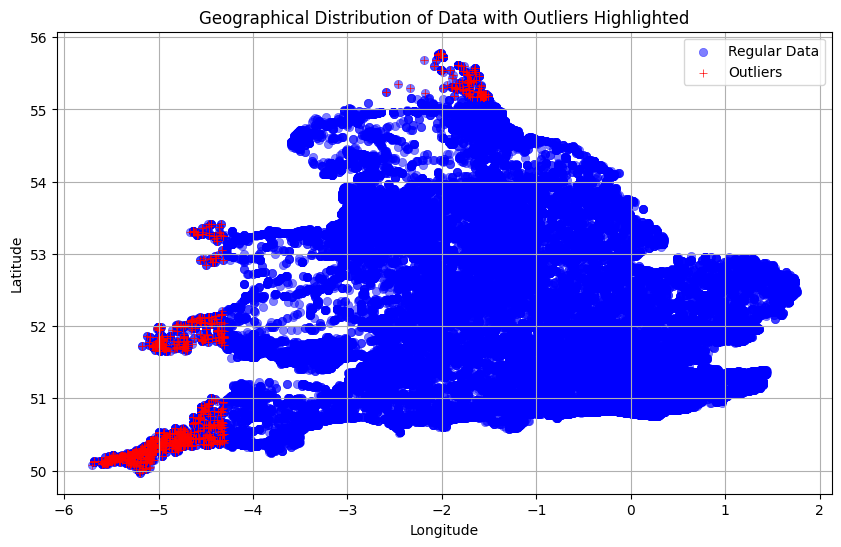

In [90]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


def detect_outliers_iqr(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.25 * IQR
    upper_bound = Q3 + 1.25 * IQR
    return (data < lower_bound) | (data > upper_bound)

# Detect outliers in latitude and longitude
latitude_outliers = detect_outliers_iqr(df['latitude'])
longitude_outliers = detect_outliers_iqr(df['longitude'])

# Create a new DataFrame for outliers for easier plotting
outliers_df = df[latitude_outliers | longitude_outliers]

# Plotting
plt.figure(figsize=(10, 6))
sns.scatterplot(x='longitude', y='latitude', data=df, color='blue', alpha=0.5, edgecolor=None, label='Regular Data')
sns.scatterplot(x='longitude', y='latitude', data=outliers_df, color='red', marker='+', label='Outliers')
plt.title('Geographical Distribution of Data with Outliers Highlighted')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.grid(True)
plt.show()


### develop a classification model using the provided data that accurately predicts fatal injuries

In [110]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline  # Import the pipeline from imblearn to handle SMOTE correctly

# Selecting features and the target variable
features = df_cleaned[['speed_limit', 'weather_conditions', 'road_type', 'light_conditions', 'number_of_vehicles', 'day_of_week']]
target = df_cleaned['accident_severity'].apply(lambda x: 1 if x == 1 else 0)  # 1 for fatal, 0 for non-fatal

# Handling categorical variables
categorical_features = ['weather_conditions', 'road_type', 'light_conditions', 'day_of_week']
numerical_features = ['speed_limit', 'number_of_vehicles']

# Preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.25, random_state=0)

# SMOTE for balancing the dataset
smote = SMOTE(random_state=42)

# Dictionary of models
models = {
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'XGBoost': xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Logistic Regression': LogisticRegression(random_state=42)
}

# Train and evaluate models
results = {}
for name, model in models.items():
    # Create a pipeline that includes preprocessing, SMOTE, and the model
    pipeline = ImbPipeline(steps=[('preprocessor', preprocessor),
                                  ('smote', smote),
                                  ('classifier', model)])
    
    # Training the model on the training set
    pipeline.fit(X_train, y_train)
    
    # Making predictions on the test set
    y_pred = pipeline.predict(X_test)
    
    # Evaluating the model
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    
    results[name] = (accuracy, report)
    print(f"Model: {name}")
    print("Accuracy:", accuracy)
    print("Classification Report:\n", report)


Model: Random Forest
Accuracy: 0.8164837776809413
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.82      0.90     49517
           1       0.07      0.67      0.12       969

    accuracy                           0.82     50486
   macro avg       0.53      0.75      0.51     50486
weighted avg       0.97      0.82      0.88     50486

Model: XGBoost
Accuracy: 0.7866735332567445
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.79      0.88     49517
           1       0.06      0.68      0.11       969

    accuracy                           0.79     50486
   macro avg       0.53      0.73      0.49     50486
weighted avg       0.97      0.79      0.86     50486

Model: Decision Tree
Accuracy: 0.8190389414887296
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.82      0.90     49517
           1       0.